# Exercise 8
- Train a _LinearSVC_ on a linearly separable dataset
- Then train an _SVC_ and a _SGDClassifier_ on the same dataset
- See if you can get them to produce roughly the same model.

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

X = X[(y == 0) | (y == 1)] # setosa or versicolor
y = y[(y == 0) | (y == 1)]

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C = 5
lin_clf = LinearSVC(C=C, loss='hinge', random_state=42)
svm_clf = SVC(kernel='linear', C=C, random_state=42)
sgd_clf = SGDClassifier(loss='hinge', alpha=1/(len(X) * C), random_state=42,
                        learning_rate="constant", eta0=0.001, max_iter=100000, tol=-np.infty)
# learning_rate: the learning rate schedule -> 'constant': eta = eta0
# eta0: the initial learning rate for the 'constant', 'invscaling' or 'adaptive' schedules.
# tol: The stopping criterion.

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print(lin_clf.intercept_, lin_clf.coef_)
print(svm_clf.intercept_, svm_clf.coef_)
print(sgd_clf.intercept_, sgd_clf.coef_)

[0.28474532] [[1.05364923 1.09903601]]
[0.31896852] [[1.1203284  1.02625193]]
[0.319] [[1.12072936 1.02666842]]


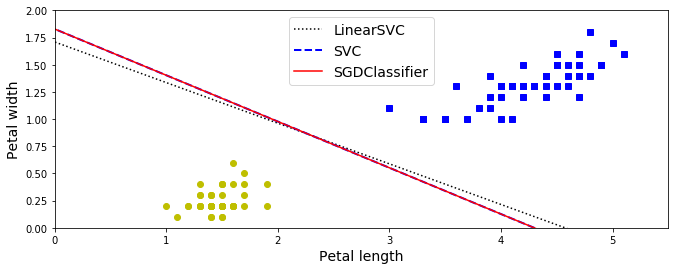

In [3]:
# inspired by https://github.com/ageron/handson-ml/blob/master/05_support_vector_machines.ipynb
%matplotlib inline
import matplotlib.pyplot as plt

# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()